## Exploratory Data Analysis

## Data Import

In [19]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import pickle

In [2]:
fdf3 = pd.read_pickle('data1/fdf3.pkl')

### Univariate Analysis

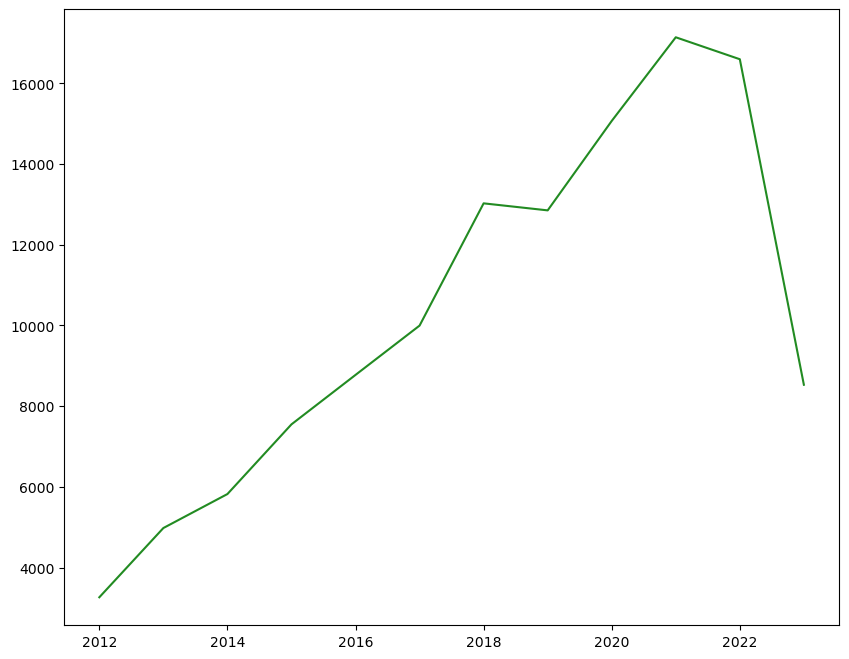

In [4]:
#plot every data point for each year
plt.figure(figsize=(10,8))
fdf3["year"].value_counts().sort_index().plot(color="forestgreen")
plt.show()

This is the graph that represents the total number of datapoints in my dataset. As we can see we have a lot of datapoints for the later years and not a lot of data for the earlier years. This may prove to be an issue as time goes on.


### Distribution of my continuous data

**Market Value distribution plots**

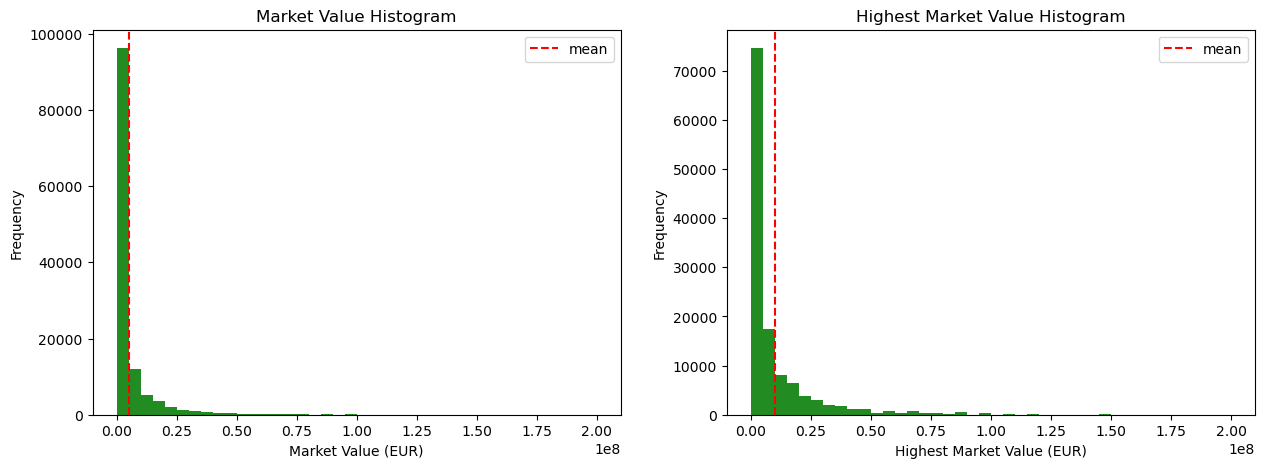

In [5]:

# make a subplot frame
plt.subplots(1,2, figsize=(15, 5))

#Market value
plt.subplot(1, 2, 1)
plt.hist(fdf3["market_value"], bins=40,color="forestgreen")
plt.axvline(fdf3["market_value"].mean(), color="red", linestyle="--", label="mean")
plt.xlabel("Market Value (EUR)")
plt.ylabel("Frequency")
plt.title("Market Value Histogram")
plt.legend()

#Highest market value
plt.subplot(1, 2, 2)
plt.hist(fdf3["highest_ever_market_value"], bins=40,color="forestgreen")
plt.axvline(fdf3["highest_ever_market_value"].mean(), color="red", linestyle="--", label="mean")
plt.xlabel("Highest Market Value (EUR)")
plt.ylabel("Frequency")
plt.title("Highest Market Value Histogram")
plt.legend()

plt.show()


* First plot represents the constantly changing market value column in my dataset
* Second plot represents the peak of a players value across the entirety of the 2012-2023 timespan of my data

**Physical Attributes**

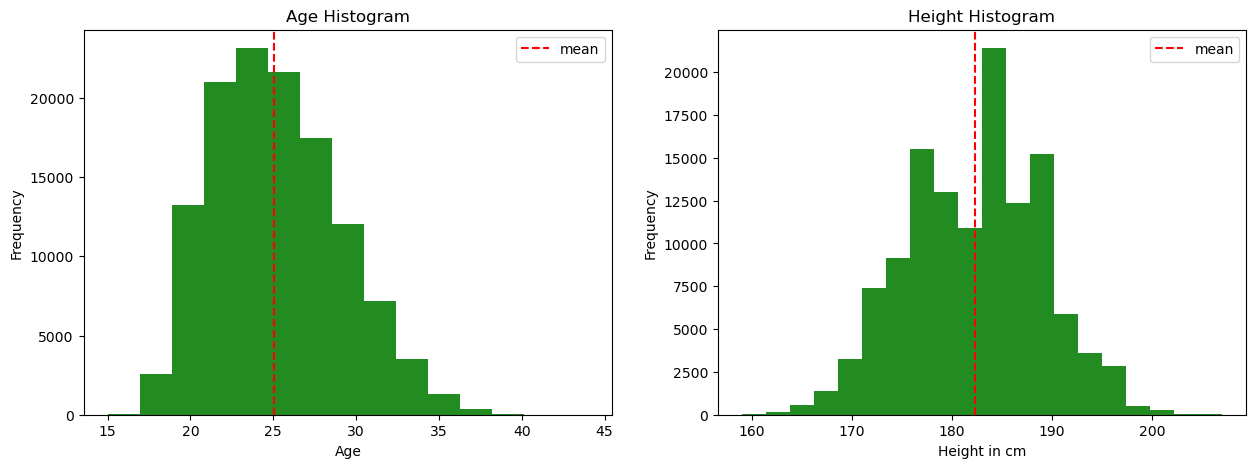

In [6]:
# make a subplot frame
plt.subplots(1,2, figsize=(15, 5))

#Age
plt.subplot(1, 2, 1)
plt.hist(fdf3["age"], bins=15,color="forestgreen")
plt.axvline(fdf3["age"].mean(), color="red", linestyle="--", label="mean")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Histogram")
plt.legend()

#Height
plt.subplot(1,2,2)
plt.hist(fdf3["height_in_cm"],bins=20,color="forestgreen")
plt.axvline(fdf3["height_in_cm"].mean(),color="red",linestyle="--",label="mean")
plt.xlabel("Height in cm")
plt.ylabel("Frequency")
plt.title("Height Histogram")
plt.legend()



* In my age histogram the mean sits at almost exactly 25 indicating that thats the average footballer age in my dataset. It takes a normally distributed shape with a slightly right skew which deos make logical sense as football players are more often "young" then they are "old".
* My height histogram also loosely follows that normally distributed shape except that the mode falls very far from the mean. It looks ever so slightly left skewed. The mean seems to sit at the 180-185 height range suggesting that that is the average height of a footballer.

**Yearly Player stats**

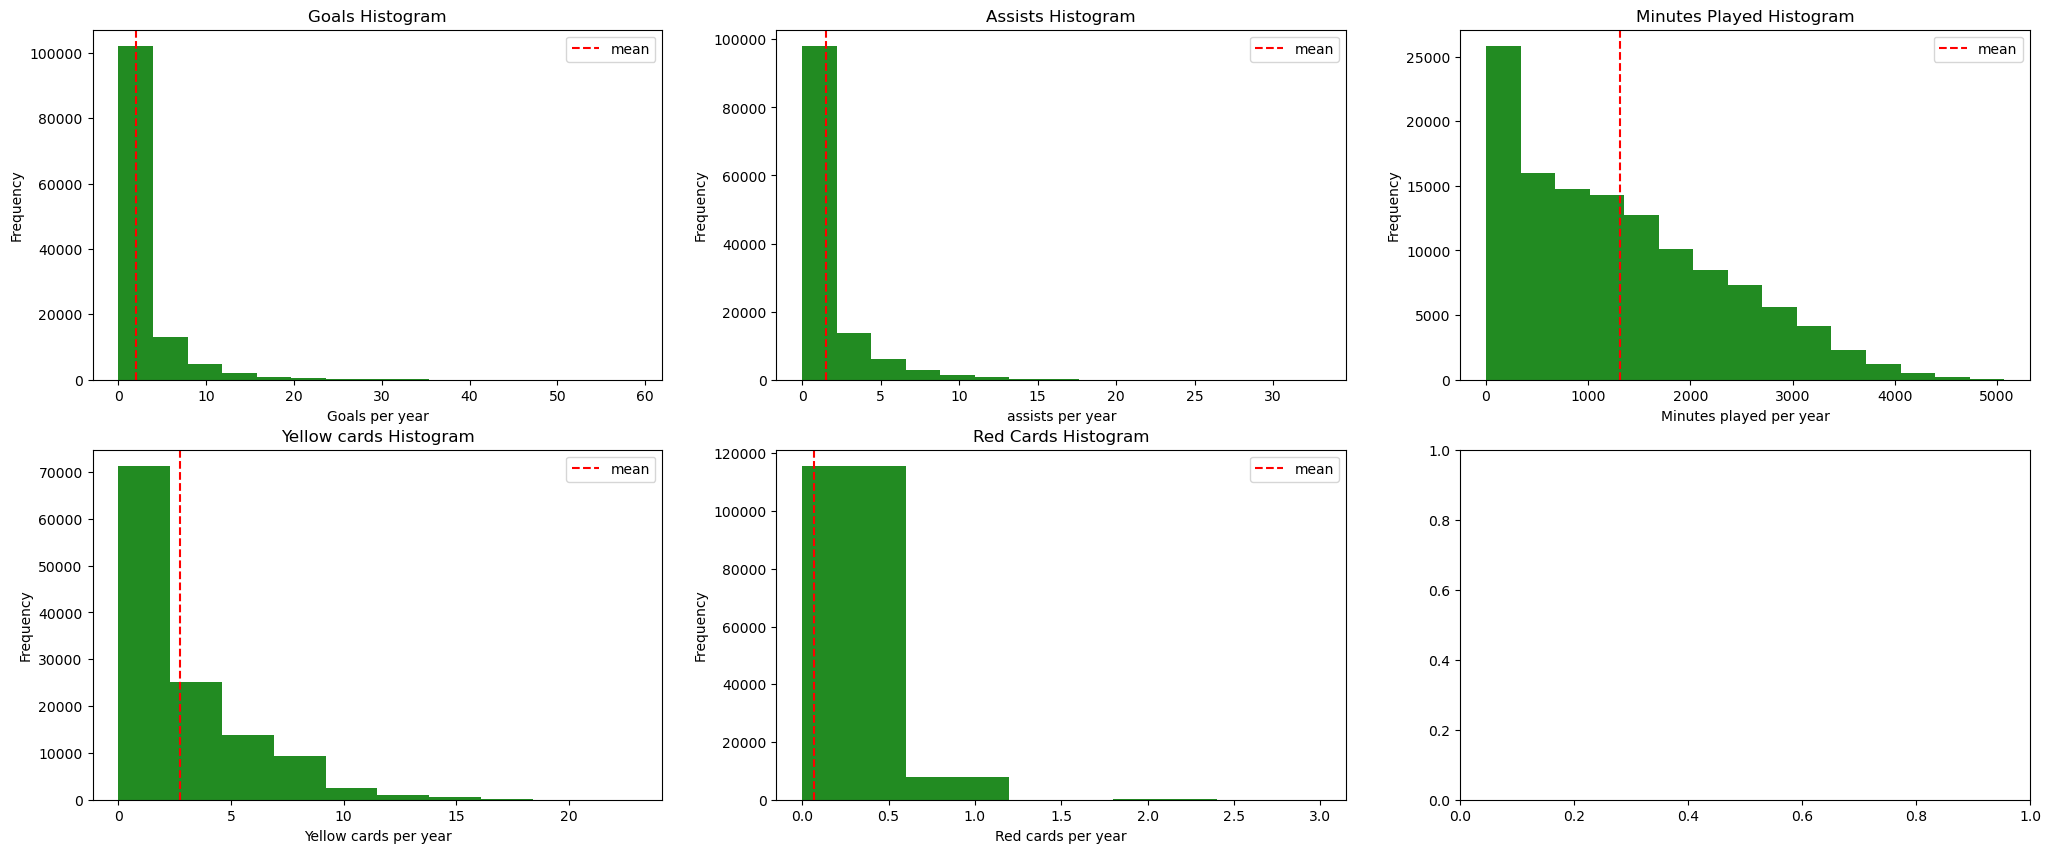

In [26]:
# make a subplot frame
plt.subplots(2,3, figsize=(25, 10))

#goals
plt.subplot(2, 3, 1)
plt.hist(fdf3["goals"], bins=15,color="forestgreen")
plt.axvline(fdf3["goals"].mean(), color="red", linestyle="--", label="mean")
plt.xlabel("Goals per year")
plt.ylabel("Frequency")
plt.title("Goals Histogram")
plt.legend()

#assists
plt.subplot(2,3,2)
plt.hist(fdf3["assists"],bins=15,color="forestgreen")
plt.axvline(fdf3["assists"].mean(),color="red",linestyle="--",label="mean")
plt.xlabel("assists per year")
plt.ylabel("Frequency")
plt.title("Assists Histogram")
plt.legend()

#minutes played
plt.subplot(2,3,3)
plt.hist(fdf3["minutes_played"],bins=15,color="forestgreen")
plt.axvline(fdf3["minutes_played"].mean(),color="red",linestyle="--",label="mean")
plt.xlabel("Minutes played per year")
plt.ylabel("Frequency")
plt.title("Minutes Played Histogram")
plt.legend()

#yellow cards
plt.subplot(2,3,4)
plt.hist(fdf3["yellow_cards"],bins=10,color="forestgreen")
plt.axvline(fdf3["yellow_cards"].mean(),color="red",linestyle="--",label="mean")
plt.xlabel("Yellow cards per year")
plt.ylabel("Frequency")
plt.title("Yellow cards Histogram")
plt.legend()

#red cards
plt.subplot(2,3,5)
plt.hist(fdf3["red_cards"],bins=5,color="forestgreen")
plt.axvline(fdf3["red_cards"].mean(),color="red",linestyle="--",label="mean")
plt.xlabel("Red cards per year")
plt.ylabel("Frequency")
plt.title("Red Cards Histogram")
plt.legend()


We can make several observations from this subplot:


### Discrete Columns

`Nationalities`

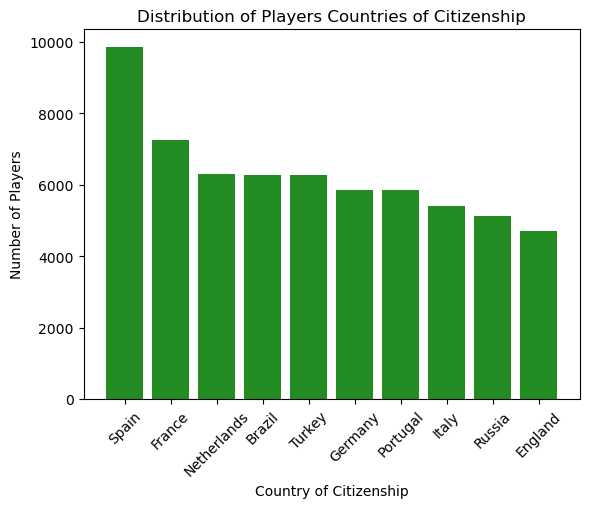

In [8]:

#group by country
country_counts = fdf3["country_of_citizenship"].value_counts()

#et the top 10
top_countries=country_counts.head(10)

#bar chart
plt.figure()
plt.bar(top_countries.index, top_countries.values, color="forestgreen")
plt.title("Distribution of Players Countries of Citizenship")
plt.xlabel("Country of Citizenship")
plt.ylabel("Number of Players")
plt.xticks(rotation=45)
plt.show()


* The top 3 countries with the most player entries are Spain, France and Brazil which makes sense. They are all very popular footballing nations.
* There are a few surprises in this list.
* England is suprisingly low down on the list.
* Turkey and Russia are suprisingly high up on the list.

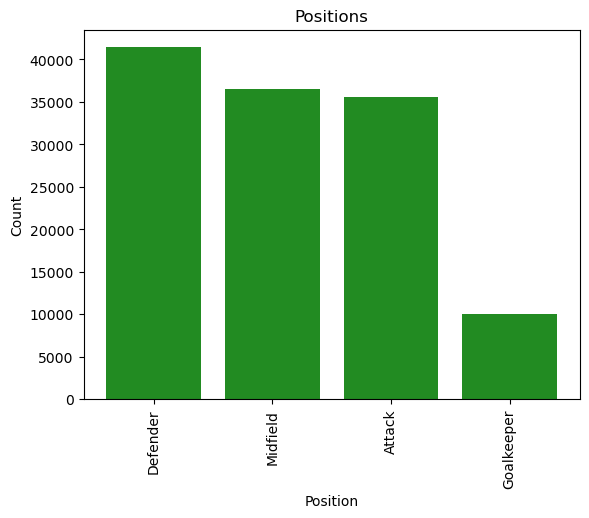

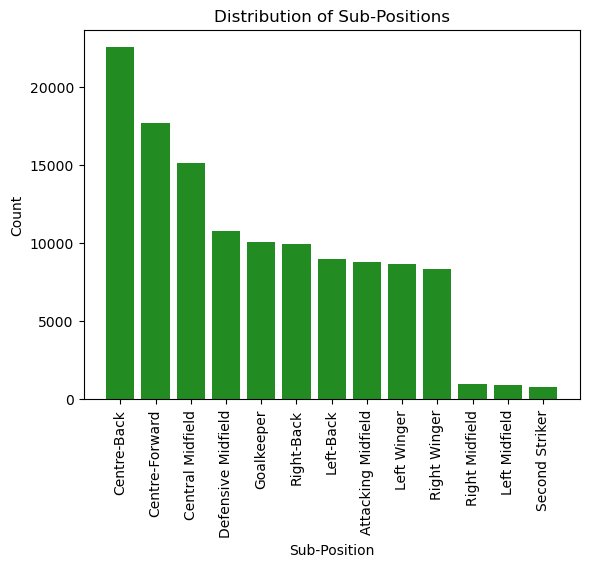

In [9]:
# Distribution of Sub-Positions

plt.figure()
plt.bar(fdf3["position"].value_counts().index, fdf3["position"].value_counts(),color="forestgreen")
plt.title("Positions")
plt.xlabel("Position")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()


# Distribution of Positions
plt.figure()
plt.bar(fdf3["sub_position"].value_counts().index, fdf3["sub_position"].value_counts(),color="forestgreen")
plt.title("Distribution of Sub-Positions")
plt.xlabel("Sub-Position")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()



`Position`
* Defenders are the most populous position in my dataset accounting for over 40000 entries.
* Midfielders and Attackers are very close behind defenders but fall just short.
* Goalkeepers have by far the least amount of entries in my dataset and it makes sense as teams usually only have 2-3 goalkeepers in the squad at any given time.

`Subposition`
* We can use the subposition collumn to really go into detail with this.
* Centre-backs, Centre-Forwards and Central midfielders lead here by a decent margin with Centrebacks being extremely common.
* Right and Left midfielders aswell as Second Strikers are very rare sub position for playrs and hence dont have many entries.

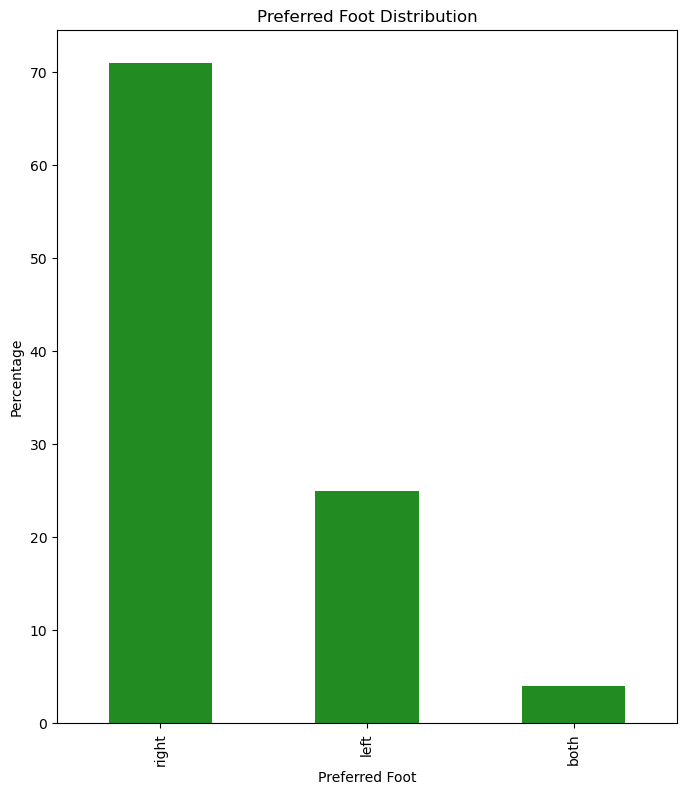

In [10]:

#set a values count for strong foot and calculate percentage
foot_counts = fdf3["foot"].value_counts()
foot_percentage = (foot_counts / foot_counts.sum()) * 100

#plot
plt.figure(figsize=(8, 9))
foot_percentage.plot(kind="bar", color="forestgreen")
plt.title("Preferred Foot Distribution")
plt.xlabel("Preferred Foot")
plt.ylabel("Percentage")

plt.show()


`preferred foot`
* Right foot holds the majority of the entries in the dataset with almost 71% of players being dominantly right footed.
* Left foot on the other hand represents just above 25% of the entries in the dataset.
* Ambidextrous players are far and few between in my dataset accounting for only about 5%

### Bivariate Analysis

#### Exploring correlation

In [11]:
#take an initial look into correlations
fdf3.corr()

C:\Users\moham\AppData\Local\Temp\ipykernel_18212\1952811315.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fdf3.corr()


,player_id,last_season_x,most_recent_club_id,height_in_cm,market_value,highest_ever_market_value,age,contract_days_left,month,year,goals,assists,yellow_cards,red_cards,minutes_played,player_club_id,net_transfer_record,national_team_players
player_id,1.000000,0.251636,0.043355,-0.035371,-0.046203,-0.068817,-0.592429,0.368863,0.102530,0.486886,-0.105584,-0.118354,-0.156473,-0.034648,-0.257558,0.091113,0.043600,-0.059068
last_season_x,0.251636,1.000000,0.003195,0.059551,0.206857,0.259766,-0.024892,0.478757,0.072667,0.449494,0.133198,0.153772,0.139445,0.027477,0.248652,0.003242,-0.029177,0.239866
most_recent_club_id,0.043355,0.003195,1.000000,-0.028108,-0.117608,-0.143922,0.025936,-0.100343,0.023274,0.024629,-0.069867,-0.077205,-0.041918,-0.012439,-0.100307,0.587460,0.016508,-0.207922
height_in_cm,-0.035371,0.059551,-0.028108,1.000000,-0.011002,-0.012838,0.064005,0.044763,0.017256,0.017718,-0.052096,-0.201918,-0.016304,0.031635,0.053278,-0.018071,-0.009115,0.018335
market_value,-0.046203,0.206857,-0.117608,-0.011002,1.000000,0.803066,0.029209,0.265207,0.037947,0.071306,0.435758,0.427006,0.244392,0.044559,0.438974,-0.111263,-0.181890,0.479880
highest_ever_market_value,-0.068817,0.259766,-0.143922,-0.012838,0.803066,1.000000,-0.022764,0.327589,0.003643,-0.003951,0.429326,0.422287,0.227419,0.040596,0.413370,-0.134203,-0.164448,0.503406
age,-0.592429,-0.024892,0.025936,0.064005,0.029209,-0.022764,1.000000,-0.273547,0.065201,0.216577,0.074871,0.063046,0.158564,0.044451,0.229824,0.042501,-0.044448,0.006827
contract_days_left,0.368863,0.478757,-0.100343,0.044763,0.265207,0.327589,-0.273547,1.000000,0.050353,0.304384,0.123098,0.132870,0.081035,0.017057,0.169269,-0.061392,-0.002595,0.231080
month,0.102530,0.072667,0.023274,0.017256,0.037947,0.003643,0.065201,0.050353,1.000000,0.147809,-0.011212,-0.016124,-0.016383,-0.009827,-0.026512,0.030754,0.004673,0.010792
year,0.486886,0.449494,0.024629,0.017718,0.071306,-0.003951,0.216577,0.304384,0.147809,1.000000,-0.031355,-0.035153,-0.035984,-0.010681,-0.051746,0.099672,-0.004505,0.041329


I"ll now be setting up a heatmap of my correlations to get a better visual of how my collumns look against each other.

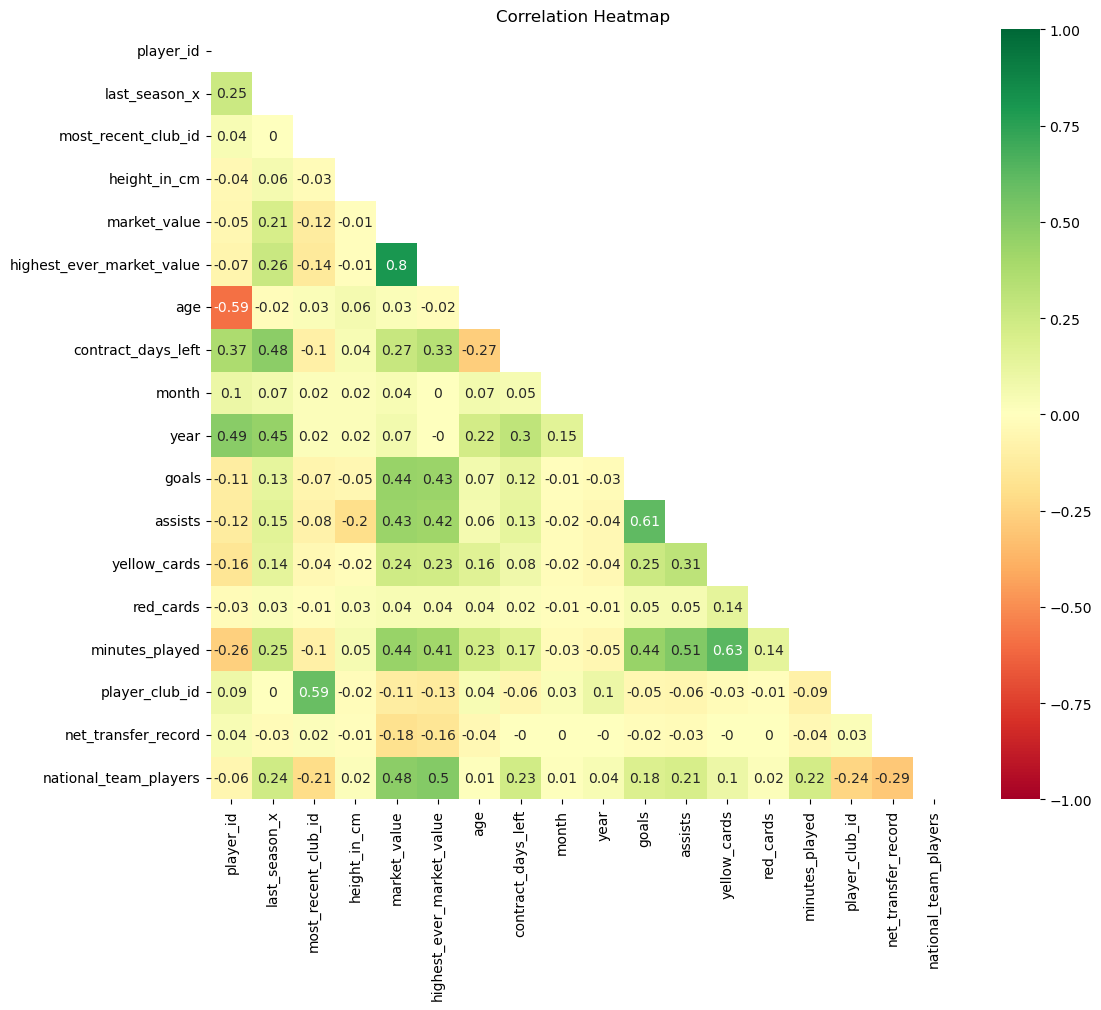

In [25]:
#create the heatmap and customize the heatmap
mask = np.triu(np.ones_like(fdf3.corr(), dtype=bool))
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(round(fdf3.corr(),2), annot=True, cmap="RdYlGn", center=0, vmin=-1, vmax=1,mask=mask)
heatmap.set_title("Correlation Heatmap")

plt.show()

##### Correlation Analysis

1. **Player Age vs. Player ID**: There"s a moderate negative correlation at -0.59. Younger players tend to have higher player IDs, indicating that player IDs are assigned sequentially or chronologically.

2. **Player Age vs. Last Season**: The correlation between age and the last season played is slightly positive at 0.02. This suggests that player age and the last season are weakly related, with age potentially increasing slightly over seasons.

3. **Player Age vs. Contract Days Left**: Age has a negative correlation at -0.27 with the number of days left in the player"s contract. Younger players tend to have more time remaining in their contracts.

4. **Year vs. Player ID**: There"s a positive correlation at 0.49 between the year and player ID. This indicates that player IDs may increase over the years, possibly due to new players joining the dataset each year.

5. **Goals vs. Assists**: The number of goals and assists have a strong positive correlation at 0.61, which makes sense since players with more goals often have more assists.

6. **Yellow Cards vs. Red Cards**: Yellow card count and red card count are positively correlated at 0.14. This means that players who receive more yellow cards are also more likely to receive red cards.

7. **Goals vs. Minutes Played**: Goals and minutes played are positively correlated at 0.45, suggesting that players who spend more time on the field tend to score more goals.

8. **Assists vs. Minutes Played**: There"s a positive correlation at 0.52 between assists and minutes played. Players with more playing time tend to provide more assists.

9. **Yellow Cards vs. Minutes Played**: Yellow cards are weakly correlated with minutes played at 0.14. Players with more playing time might accumulate more yellow cards.



**sidenote** - The `highest_ever_market_value` collumn is very highly correlated with my target variable. For my model this will be problematic as what happens when a player is being valued for the first time ? we won't always have this data so it would be best to drop it.

### Plotting Bivariate Analysis

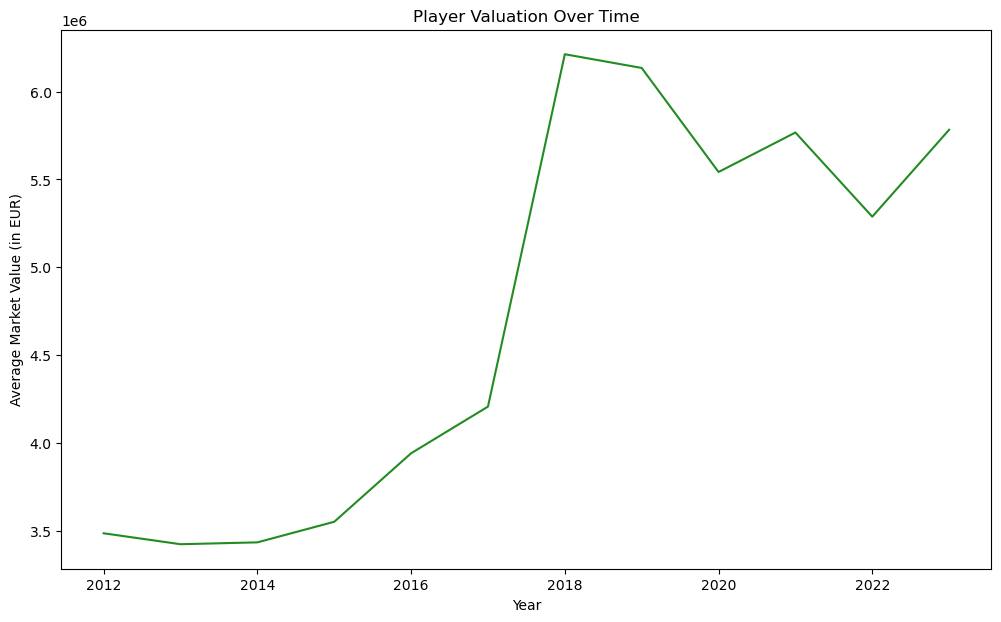

In [13]:
#group market value by year and get average
market_value_by_year = fdf3.groupby("year")["market_value"].mean()

#plot
plt.figure(figsize=(12, 7))
plt.plot(market_value_by_year.index, market_value_by_year.values, linestyle="-",color="forestgreen")
plt.title("Player Valuation Over Time")
plt.xlabel("Year")
plt.ylabel("Average Market Value (in EUR)")
plt.show()


`Average Player Valuations over time`
* There seemed to be a general inflation of Average Player valuations over time in the earlier years with a massive spike between 2015 and 2018 where the average player valuation almost doubled.
* There seems to have been a slight decrease since then which could be attributed to the Covid-19 pandemic in 2020 which the market has just begun to recover from.
* Perhaps there are underlying reasons for this fluctuating valuations throughout the years.

In [14]:
fdf3.groupby("sub_position")["market_value"].mean().sort_values(ascending=False)


sub_position
Second Striker        9.922778e+06
Left Winger           6.440925e+06
Central Midfield      5.942889e+06
Attacking Midfield    5.848678e+06
Centre-Forward        5.836774e+06
Right Winger          5.657970e+06
Defensive Midfield    4.933177e+06
Centre-Back           4.767350e+06
Left-Back             3.856758e+06
Right-Back            3.750302e+06
Right Midfield        3.730579e+06
Left Midfield         3.714939e+06
Goalkeeper            3.567448e+06
Name: market_value, dtype: float64

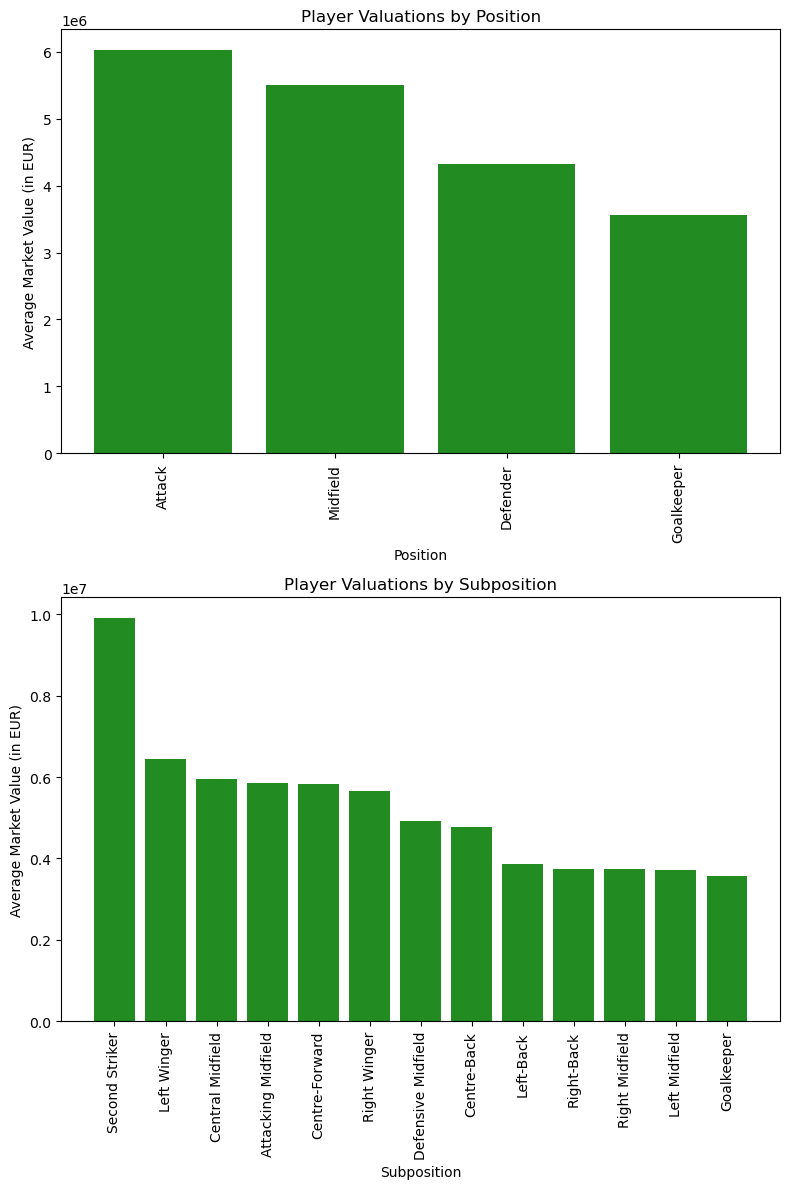

In [15]:
#group by position and subposition
position_market_value = fdf3.groupby("position")["market_value"].mean().sort_values(ascending=False)
subposition_market_value = fdf3.groupby("sub_position")["market_value"].mean().sort_values(ascending=False)

#make subplot
plt.subplots(2, 1, figsize=(8, 12))

#plot position
plt.subplot(2,1, 1)
plt.bar(position_market_value.index, position_market_value.values,color="forestgreen")
plt.title("Player Valuations by Position") 
plt.xlabel("Position")
plt.ylabel("Average Market Value (in EUR)")
plt.xticks(rotation=90)

#plot subpositions
plt.subplot(2,1, 2)
plt.bar(subposition_market_value.index, subposition_market_value.values,color="forestgreen")
plt.title("Player Valuations by Subposition") 
plt.xlabel("Subposition")
plt.ylabel("Average Market Value (in EUR)")
plt.xticks(rotation=90)

#display the subplots
plt.tight_layout()


`Player Valuations by Positions and Subpositions` <br>

`Position`
* attackers and midfielders generally are valued the highest at around 5-6 million (EUR)
* defenders are valued slightly lower at around 4.5 million (EUR)
* goalkeepers are valued the lowest at around 3.75 million (EUR)

`Subposition`
* There seems to be a lot of variation in valuations of players based on their subposition
* for example Second Striker is valued at almost 10 million and goalkeepers at around 3-4 million.
* The attacking roles seem to generally be more valuable than the defensive roles with 4 of the bottom 5 least valuable positions being defensive ones.

In [16]:
#turn my dataset into a  to load into the next notebook
fdf3.to_csv("data1/my_dataset.csv", index=False)